Epoch 1/12
1229/1229 [==============================] - 49s 39ms/step - loss: 0.7812 - accuracy: 0.6758 - val_loss: 0.4650 - val_accuracy: 0.8253
Epoch 2/12
1229/1229 [==============================] - 43s 35ms/step - loss: 0.4686 - accuracy: 0.8100 - val_loss: 0.3811 - val_accuracy: 0.8434
Epoch 3/12
1229/1229 [==============================] - 42s 34ms/step - loss: 0.3527 - accuracy: 0.8655 - val_loss: 0.3228 - val_accuracy: 0.8776
Epoch 4/12
1229/1229 [==============================] - 41s 34ms/step - loss: 0.2961 - accuracy: 0.8834 - val_loss: 0.2462 - val_accuracy: 0.9008
Epoch 5/12
1229/1229 [==============================] - 40s 33ms/step - loss: 0.2299 - accuracy: 0.9083 - val_loss: 0.2409 - val_accuracy: 0.8989
Epoch 6/12
1229/1229 [==============================] - 39s 32ms/step - loss: 0.1930 - accuracy: 0.9272 - val_loss: 0.2352 - val_accuracy: 0.9131
Epoch 7/12
1229/1229 [==============================] - 40s 33ms/step - loss: 0.1547 - accuracy: 0.9412 - val_loss: 0.2884 -

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 22, 22, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                    

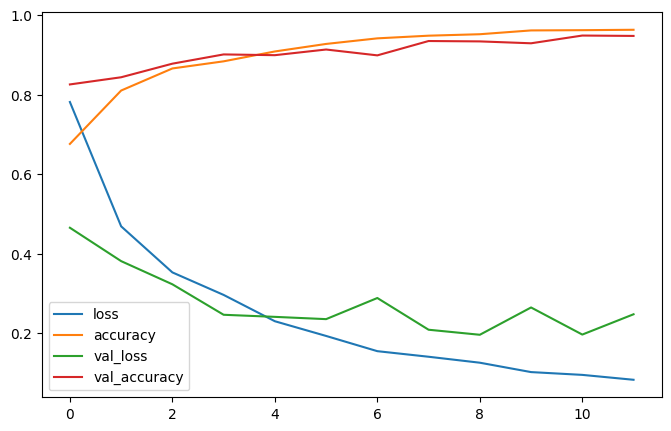

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import time
import pandas as pd
from keras.optimizers import SGD

#loads stored pixel data for usage
pickle_in = open("/content/drive/MyDrive/Brain-tumor-detection-ai/X.pickle","rb")
X = pickle.load(pickle_in)

#loads stored label data
pickle_in = open("/content/drive/MyDrive/Brain-tumor-detection-ai/y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

#trains the model through 6 layers - optimized do not change
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4))
model.add(Activation('softmax'))

#opt = SGD(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#converts data to array to bypass error - do not touch
X = np.array(X)
y = np.array(y)

#model is fitted with optimized variables
model_history = model.fit(X, y, batch_size=4, epochs=12, validation_split=0.3)


#model is saved for further usage
model.save('/content/drive/MyDrive/Brain-tumor-detection-ai/Brain-tumor-detector-CNN.model')

#model shows all data for developer analysis
print(model.summary()) 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
import cv2

def prepare():
  img_array = cv2.imread('images.jpg')
  new_array = cv2.resize(img_array, (50, 50))
  ary = new_array.reshape(-1, 50, 50, 3)
  return ary

prediction = model.predict(prepare())
g =np.argmax(prediction)